In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
phising = pd.read_csv('/content/drive/MyDrive/Corelia/phising/dataset_phishing.csv')

In [3]:
phising.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


The concept of phising is the use of URLs to access personal information of the victim. This data set has both the URL and the class (legitimate of phising) as well as 87 features extracted features all numerical. 56 of them are from the structure of the URL, 24 from the content from the content of their corresponding pages, and 7 from external sources. The Dataset is balanced with 50% legitimate websites and 50% phising websites.

In [4]:
phising.isna().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])

There is no missing data which makes it clean data.

In [5]:
phising['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

In [6]:
#Binary encode target values 1 == legitimate
phising['status'] = pd.get_dummies(phising['status'])['legitimate'].astype('int')

In [7]:
phising[['url', 'status']]

,url,status
0,http://www.crestonwood.com/router.php,1
1,http://shadetreetechnology.com/V4/validation/a...,0
2,https://support-appleld.com.secureupdate.duila...,0
3,http://rgipt.ac.in,1
4,http://www.iracing.com/tracks/gateway-motorspo...,1
...,...,...
11425,http://www.fontspace.com/category/blackletter,1
11426,http://www.budgetbots.com/server.php/Server%20...,0
11427,https://www.facebook.com/Interactive-Televisio...,1
11428,http://www.mypublicdomainpictures.com/,1


In [8]:
phising.describe()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,0.500000
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,0.500022
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,0.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,0.500000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,1.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000,1.000000


In [9]:
phising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

We could assume that the task we are looking for is a Binary Classification.

From the understanding of the paper, it would suggest that feature extraction and Rand Forest classifier are great ways to get high accuracies for detection. Since we are working with Deep Learning, we want to evaluate the model initialy without feature extraction then with (or vice versa), to do the feature extraction and knowing that radom forest performance the best we can use it to extract the most important features to feed in this case MLPClassifier (multy layer perceptron)

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [11]:
X = phising.drop(['url', 'status'], axis=1)
y = phising['status']

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
X.shape

(11430, 87)

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X , y , random_state=10 , shuffle=True)

In [15]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train.values)
x_test =  scaler.fit_transform(x_test.values)


In [16]:
model = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[87]),
    layers.Dropout(rate=0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [17]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [18]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.1214
Best Validation Accuracy: 0.9594


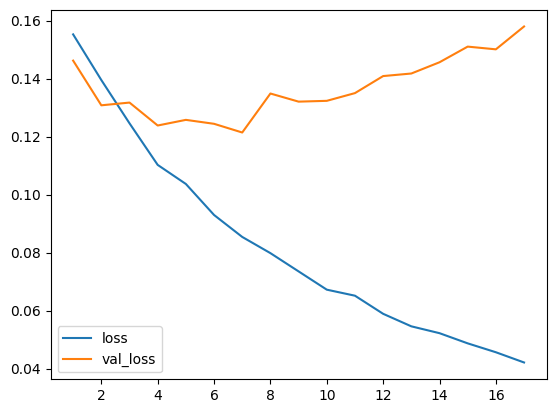

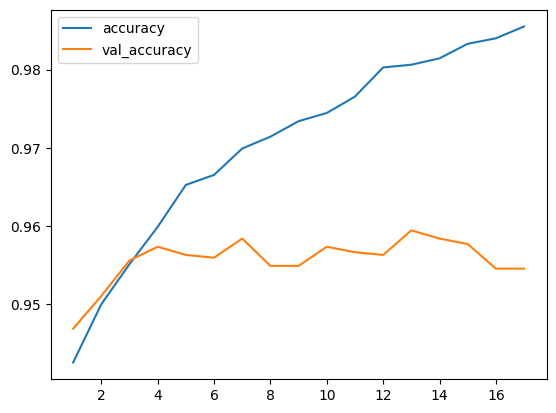

In [19]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_accuracy'].max()))

Now we are going to test the same model with feature selection

In [20]:
# prompt: Random Forest feature selection of best data columns to use

from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier.
clf = RandomForestClassifier(n_estimators=100)

# Train the classifier on the training data.
clf.fit(x_train, y_train)

# Get the feature importances.
importances = clf.feature_importances_

# Create a dataframe with the feature importances.
feature_importances = pd.DataFrame({
    "feature": X.columns,
    "importance": importances,
})

# Sort the dataframe by importance in descending order.
feature_importances = feature_importances.sort_values("importance", ascending=False)

# Print the top 10 most important features.
print(feature_importances.head(10))


                feature  importance
85         google_index    0.190653
86            page_rank    0.100728
56        nb_hyperlinks    0.092847
83          web_traffic    0.066248
20               nb_www    0.046209
82           domain_age    0.035468
46    longest_word_path    0.030818
58  ratio_extHyperlinks    0.027993
74          safe_anchor    0.023030
57  ratio_intHyperlinks    0.021993


In [21]:
feature_importances.head(40)

,feature,importance
85,google_index,0.190653
86,page_rank,0.100728
56,nb_hyperlinks,0.092847
83,web_traffic,0.066248
20,nb_www,0.046209
82,domain_age,0.035468
46,longest_word_path,0.030818
58,ratio_extHyperlinks,0.027993
74,safe_anchor,0.023030
57,ratio_intHyperlinks,0.021993


In [22]:
ten_best = feature_importances['feature'][:10].tolist()

In [23]:
phising_best_10 = phising[ten_best]

In [24]:
phising_best_10.head()

,google_index,page_rank,nb_hyperlinks,web_traffic,nb_www,domain_age,longest_word_path,ratio_extHyperlinks,safe_anchor,ratio_intHyperlinks
0,1,4,17,0,1,-1,6,0.470588,0.0,0.529412
1,1,2,30,0,0,5767,32,0.033333,100.0,0.966667
2,1,0,4,5828815,0,4004,17,0.000000,100.0,1.000000
3,0,3,149,107721,0,-1,0,0.026846,62.5,0.973154
4,0,6,102,8725,1,8175,11,0.529412,0.0,0.470588


In [25]:
x_train2 , x_test2 , y_train2 , y_test2 = train_test_split(phising_best_10 , y , random_state=10 , shuffle=True)

In [26]:
scaler = MinMaxScaler()
x_train2 = scaler.fit_transform(x_train2.values)
x_test2 =  scaler.fit_transform(x_test2.values)


In [27]:
model2 = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[10]),
    layers.Dropout(rate=0.1),
    layers.Dense(300, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [28]:
model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [29]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model2.fit(
    x_train2, y_train2,
    validation_data=(x_test2, y_test2),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.1817
Best Validation Accuracy: 0.9363


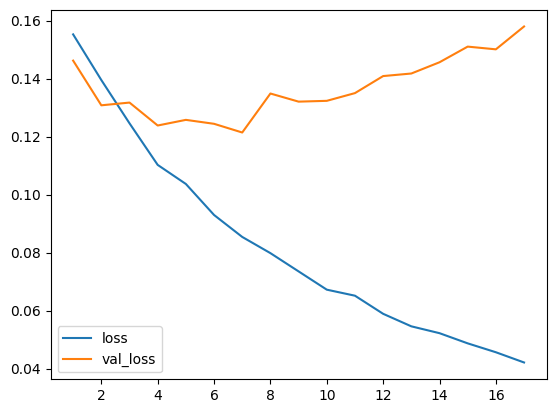

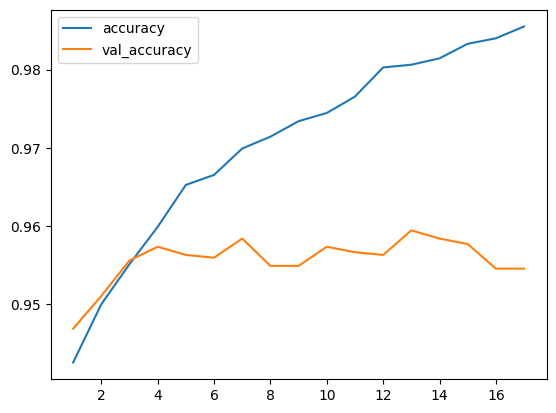

In [30]:
history_df2 = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df2['val_loss'].min(),
              history_df2['val_accuracy'].max()))

One thing we can say it's that the accuracy of the model with the 10 best features performed was less than with the complete features. What we know is when there are fewer features, the model complexity might affect the results. We should attempt to re-evaluate with a less complex model.

In [31]:
model3 = keras.Sequential([
    layers.Dense(100, activation='relu', input_shape=[10]),
    layers.Dropout(rate=0.1),
    layers.Dense(40, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [32]:
model3.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [33]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model3.fit(
    x_train2, y_train2,
    validation_data=(x_test2, y_test2),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.1865
Best Validation Accuracy: 0.9325


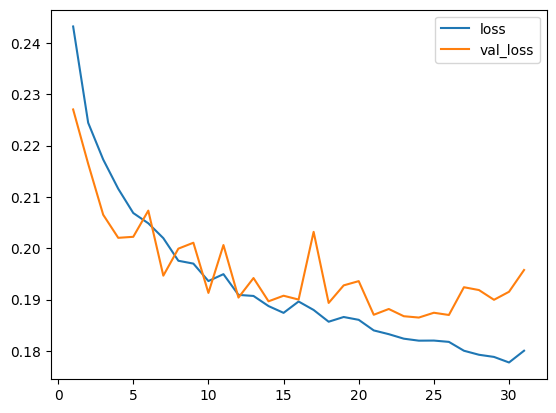

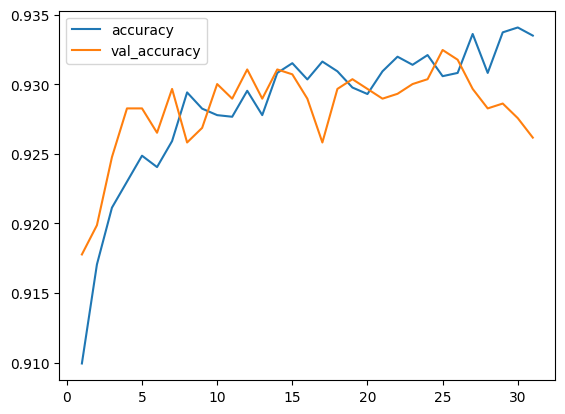

In [34]:
history_df3 = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df3.loc[1:, ['loss', 'val_loss']].plot()
history_df3.loc[1:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df3['val_loss'].min(),
              history_df3['val_accuracy'].max()))

Assumption was incorrect after we changed the number of hidden nodes, we will attempt by adding an additional layer.

In [35]:
model4 = keras.Sequential([
    layers.Dense(300, activation='relu', input_shape=[10]),
    layers.Dropout(rate=0.1),
    layers.Dense(100, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(40, activation='relu'),
    layers.Dropout(rate=0.1),
    layers.Dense(1, activation='sigmoid'),
])

In [36]:
model4.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [37]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history = model4.fit(
    x_train2, y_train2,
    validation_data=(x_test2, y_test2),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0, # hide the output because we have so many epochs
)

Best Validation Loss: 0.1765
Best Validation Accuracy: 0.9381


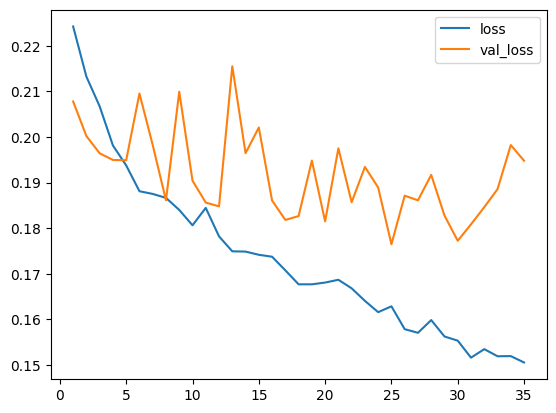

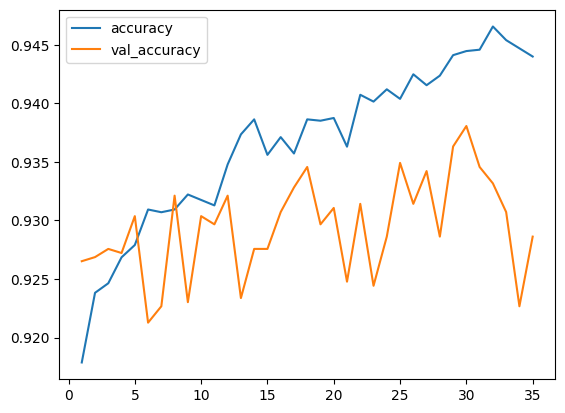

In [38]:
history_df4 = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df4.loc[1:, ['loss', 'val_loss']].plot()
history_df4.loc[1:, ['accuracy', 'val_accuracy']].plot()

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df4['val_loss'].min(),
              history_df4['val_accuracy'].max()))